## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 : 학습률 (learning rate)

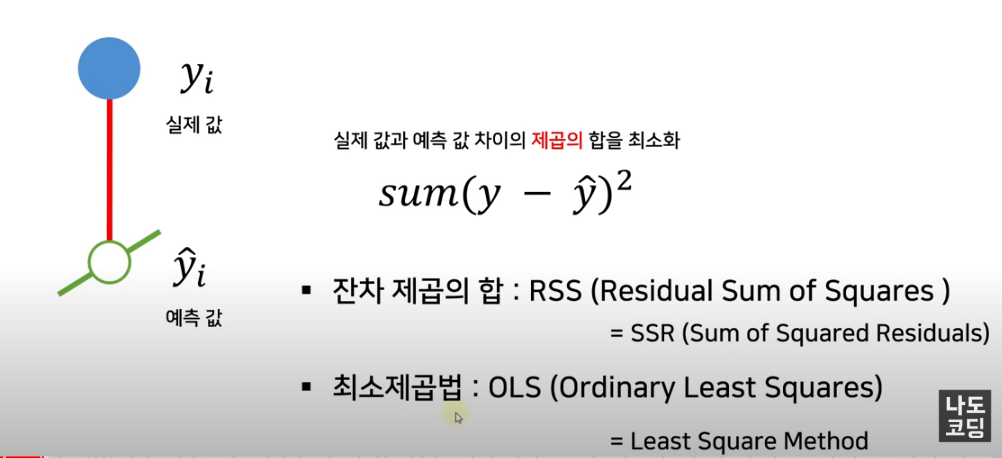

- 이 RSS, OLS를 최소화하는 걸 찾는것이 중요!
  - 하지만 이 최소제곱법은 노이즈(이상치)에 취약함
  - 또, 굉장히 많은 데이터들의 잔차를 하나하나 구해서 제곱 -> 메모리 많이 차지 
  
## 그래서 이걸 보완하기 위한방법 = 경사하강법

- 학습률 : 보폭을 얘기, 너무 크거나 너무 작아도 문제
    - 0.0001, 0.0003, 0.01, 0.03, 0.3 등의 숫자가 사용
- 에포크 : 훈련세트의 데이터 전부 사용하는 방법 
    - 한꺼번에 너무 많은 데이터를 전부 사용하면 메모리 급증
    - 그래서 일부를 학습 -> 그 다음 일부를 학습 -> 최종적으로 다 사용하는 방법 = 확률적 경사하강법

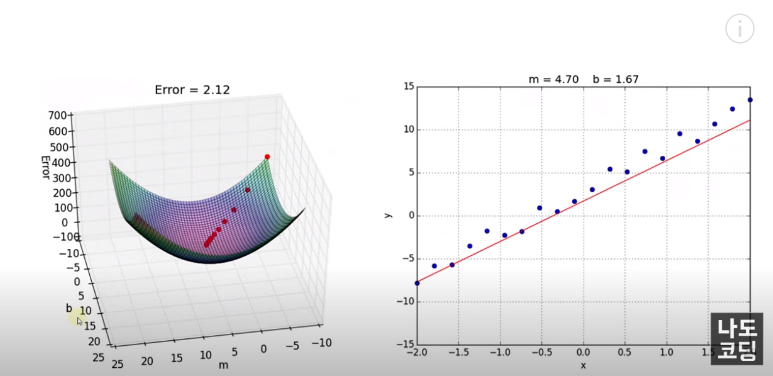

- 에러가 3차원으로 표현 경사를 점차 내려옴 = 에러가 점차 작아짐 그래서 경사하강법이라고 얘기하는 것임


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련 80 : 테스트 20 으로 분리

In [8]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법

# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)

# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

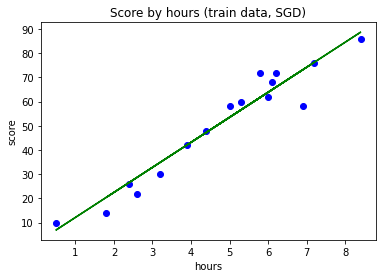

In [9]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

# 훈련세트, 테스트세트 둘을 서로 비교해야함 -> 검증

In [32]:
sr.coef_, sr.intercept_
# 주의 : SGDRegressor() 객체를 생성할 때 random_state 값을 지정하지 않았으므로 결과가 다르게 나타날 수 있습니다

(array([10.2062811]), array([1.95017289]))

In [26]:
reg.coef_
# 앞선 선형회귀모델의 기울기

array([10.49161294])

In [27]:
reg.intercept_
# 앞선 선형회귀모델의 y절편

0.6115562905169796

# score을 통해 모델평가 높을수록 좋다

In [33]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가 

0.9732274354250781

In [34]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가 

0.9349740699430755

# SDG회귀할 때 사용할 수 있는 여러 tool

지수표기법

-1e-3 : 0.001 (10^-3)

-1e-4 : 0.0001 (10^-4)

-1e+3 : 1000 (10^3)

-1e+4 : 10000 (10^4)

- eta0는 학습률의 의미 에포크를 보여준다 만약 더 작은 수를 기입하면 에포크가 훨씬 늘어나게 됨
- max_liter를 줄이면 에러가 뜰 수 있음 왜? 아직 학습이 덜됐는데 반복을 끝내버려서

In [ ]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법



# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

In [12]:
sr = SGDRegressor(max_iter=1000, eta0=0.01, random_state=0, verbose=1)
#반복횟수 max_liter(에포크 횟수)
# eta0=0.01 default 값, 학습률을 의미
#verbose=1 : 훈련세트를 반복하면서 손실이 어떻게 줄어드는가
#  ㄴ loss란 값 잘 보기


In [14]:
sr.fit(X_train, y_train)
#loss가 점점 줄어드는게 보임

-- Epoch 1
Norm: 9.29, NNZs: 1, Bias: 1.896809, T: 16, Avg. loss: 273.972341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.22, NNZs: 1, Bias: 2.051952, T: 32, Avg. loss: 21.528918
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.29, NNZs: 1, Bias: 2.048223, T: 48, Avg. loss: 19.357188
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.18, NNZs: 1, Bias: 2.017074, T: 64, Avg. loss: 19.101267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 1, Bias: 1.980206, T: 80, Avg. loss: 18.424713
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.19, NNZs: 1, Bias: 1.995352, T: 96, Avg. loss: 19.235589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.33, NNZs: 1, Bias: 2.005374, T: 112, Avg. loss: 18.213245
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.19, NNZs: 1, Bias: 1.971733, T: 128, Avg. loss: 18.722017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.08, NNZs: 1, Bias: 1.941770, T: 144, Avg. loss: 18.247385
Total training time: 0.0

SGDRegressor(random_state=0, verbose=1)